In [ ]:
import pandas as pd

# Load the training set with specified column names
df = pd.read_csv("/content/twitter_training.csv", header=None, names=['Tweet ID', 'Entity', 'Sentiment', 'Tweet content'])
print(df.head())
print(df['Sentiment'].value_counts())

   Tweet ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(t):
    # Convert input to string to handle non-string types
    t = str(t)
    t = re.sub(r"http\S+|@\w+|#\w+", "", t.lower())
    tokens = [lemmatizer.lemmatize(w) for w in re.findall(r"\b[a-z]{2,}\b", t) if w not in stop]
    return " ".join(tokens)

df['clean_text'] = df['Tweet content'].apply(clean_text)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Sentiment'], test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(Xtr, y_train)
y_pred = clf.predict(Xte)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.66      0.49      0.56      2592
    Negative       0.68      0.80      0.73      4519
     Neutral       0.66      0.63      0.65      3596
    Positive       0.70      0.71      0.71      4230

    accuracy                           0.68     14937
   macro avg       0.68      0.66      0.66     14937
weighted avg       0.68      0.68      0.67     14937



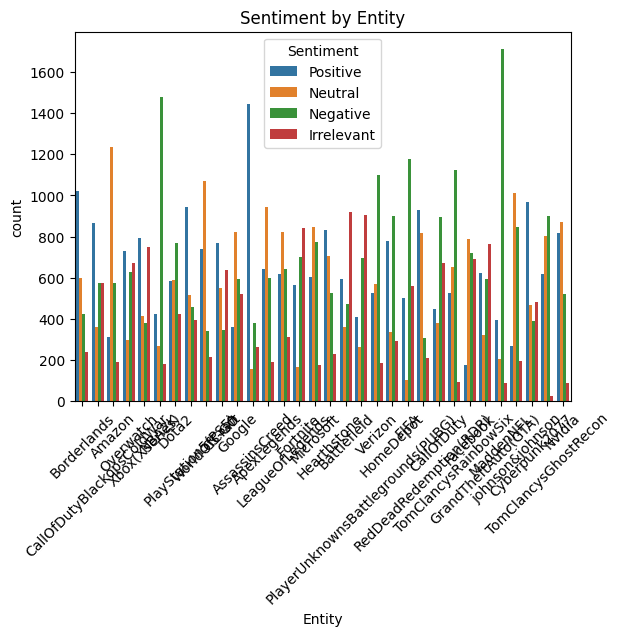

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Entity', hue='Sentiment')
plt.xticks(rotation=45)
plt.title("Sentiment by Entity")
plt.show()

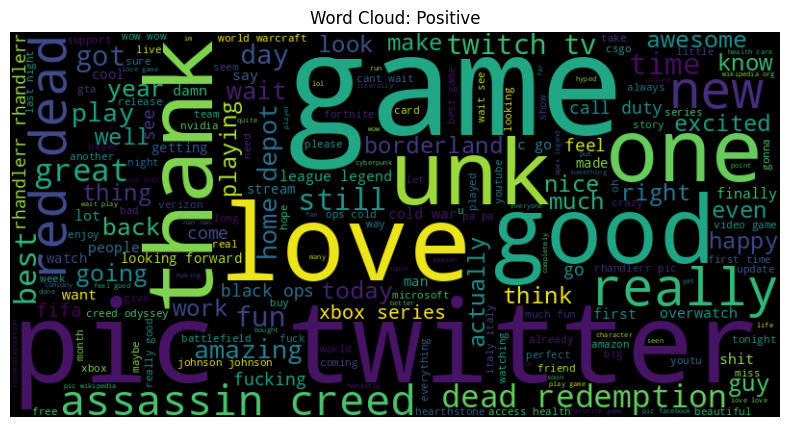

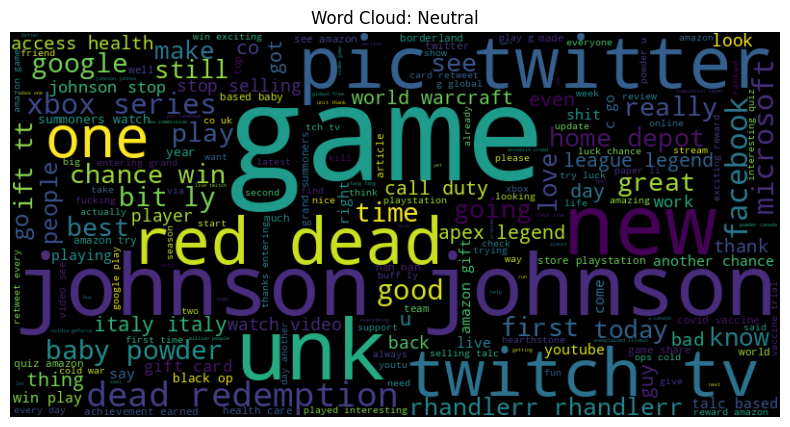

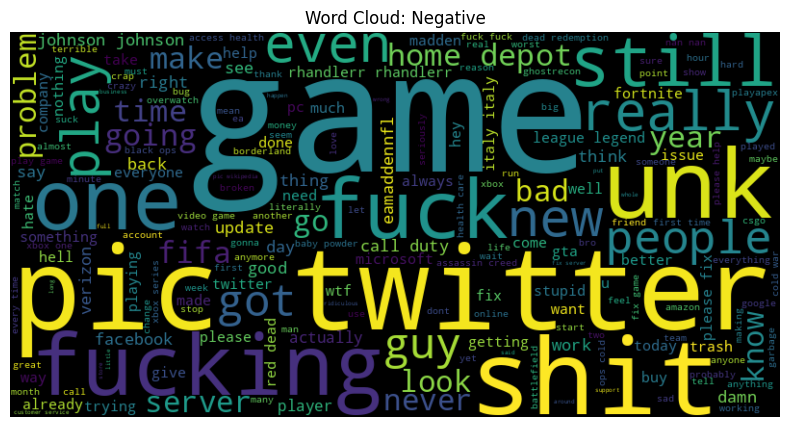

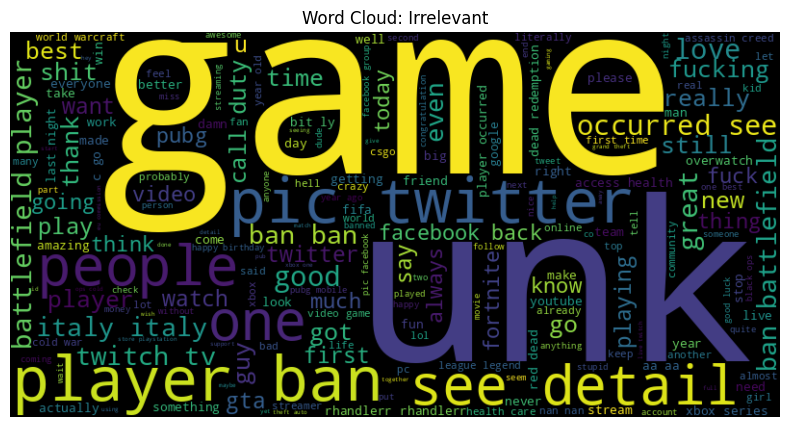

In [ ]:
from wordcloud import WordCloud

for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment']==sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud: {sentiment}")
    plt.show()

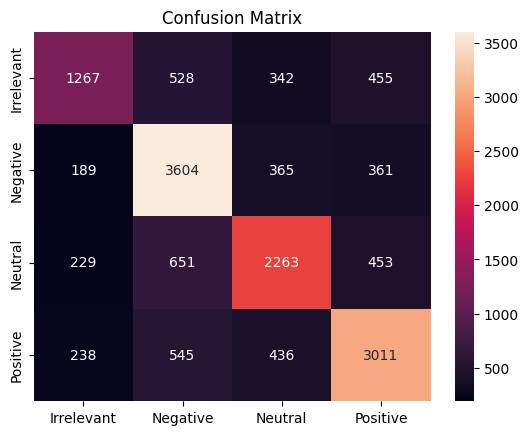

In [ ]:
import numpy as np
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.show()
